<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Standarize-variables" data-toc-modified-id="1.-Standarize-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Standarize variables</a></span></li><li><span><a href="#2.-Clustering-with-K-mean" data-toc-modified-id="2.-Clustering-with-K-mean-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Clustering with K-mean</a></span><ul class="toc-item"><li><span><a href="#2.1.-Letting-the-default-settings???" data-toc-modified-id="2.1.-Letting-the-default-settings???-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1. Letting the default settings???</a></span></li><li><span><a href="#2.2-.-Choosing-K" data-toc-modified-id="2.2-.-Choosing-K-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 . Choosing K</a></span><ul class="toc-item"><li><span><a href="#2.2.1.-Elbows" data-toc-modified-id="2.2.1.-Elbows-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>2.2.1. Elbows</a></span></li><li><span><a href="#2.2.1.-Silouhete" data-toc-modified-id="2.2.1.-Silouhete-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>2.2.1. Silouhete</a></span></li></ul></li></ul></li><li><span><a href="#3.-I-choose-for-one-k-mean-model" data-toc-modified-id="3.-I-choose-for-one-k-mean-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. I choose for one k-mean model</a></span></li><li><span><a href="#4.-Export-model" data-toc-modified-id="4.-Export-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Export model</a></span></li></ul></div>

# Scaling and training the model K-means

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #evaluate clustering
import pickle #save my models trained
import pandas as pd
import numpy as np

In [12]:
audio_features_for_cluster = pd.read_csv("../data/audio_features_for_cluster.csv",index_col=False)

In [13]:
audio_features_for_cluster = audio_features_for_cluster.iloc[:,1:]

In [14]:
audio_features_for_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.695,109.997
1,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,0.1010,0.668,168.560
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030
4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088
...,...,...,...,...,...,...,...,...,...,...,...
4595,0.599,0.796,5,-4.391,0,0.0295,0.00022,0.000357,0.0924,0.175,128.017
4596,0.623,0.833,4,-2.951,0,0.0557,0.01910,0.017400,0.3310,0.411,124.973
4597,0.722,0.761,11,-4.459,0,0.0475,0.01170,0.000000,0.3150,0.624,128.044
4598,0.596,0.856,4,-3.556,0,0.0346,0.02110,0.017800,0.1410,0.743,127.949


## 1. Standarize variables

In [16]:
scaler= StandardScaler() #I store it in this variable
scaler.fit(audio_features_for_cluster) #we are telling thim where to find the mean and standard deviation
audio_features_for_cluster_scaled = scaler.transform(audio_features_for_cluster)

In [17]:
audio_features_for_cluster_scaled

array([[ 0.94508163, -0.59294296,  0.79897722, ..., -0.57164243,
         0.46773556, -0.32966973],
       [-0.22235475,  0.21060543,  0.23549769, ..., -0.50509664,
         0.36619715,  1.79698858],
       [ 0.6172793 ,  0.86299126,  0.23549769, ..., -0.72009075,
         1.29508561, -0.5845942 ],
       ...,
       [ 0.73229766,  0.60840167,  1.6441965 , ...,  0.86421108,
         0.20072714,  0.3256895 ],
       [ 0.00768198,  0.9863081 , -0.32798183, ..., -0.24915127,
         0.6482483 ,  0.32223966],
       [-0.84920483,  0.9544844 , -0.89146136, ...,  3.00775354,
        -0.32200766,  1.93087839]])

In [19]:
#Now I create a data fram with the arrays

scaled_df = pd.DataFrame(audio_features_for_cluster_scaled, columns=audio_features_for_cluster.columns)

In [21]:
scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4600.000000,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03
mean,4.881120e-16,1.977162e-16,-1.297513e-16,-2.224308e-16,2.239754e-17,-6.796496e-17,0.000000,4.942906e-17,1.297513e-16,1.977162e-16,-9.051697e-16
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.419865e+00,-2.410474e+00,-1.454941e+00,-6.241260e+00,-1.446167e+00,-9.340859e-01,-1.031151,-4.136597e-01,-1.055379e+00,-2.145938e+00,-4.324104e+00
25%,-5.559080e-01,-6.168107e-01,-8.914614e-01,-3.417867e-01,-1.446167e+00,-4.615468e-01,-0.877609,-4.136597e-01,-5.869992e-01,-7.620075e-01,-7.514208e-01
50%,1.342022e-01,1.907156e-01,-4.624207e-02,2.599634e-01,6.914833e-01,-3.480239e-01,-0.367334,-4.134732e-01,-3.771240e-01,1.067101e-01,1.567665e-02
75%,7.150449e-01,8.192337e-01,7.989772e-01,6.547796e-01,6.914833e-01,-7.805224e-02,0.756356,-3.800268e-01,2.563408e-01,8.447439e-01,5.532059e-01
max,2.158525e+00,1.555157e+00,1.644197e+00,1.891484e+00,6.914833e-01,1.246162e+01,2.058410,3.367873e+00,5.170492e+00,1.558333e+00,3.249949e+00


## 2. Clustering with K-mean

### 2.1. Letting the default settings???

### 2.2 . Choosing K

#### 2.2.1. Elbows

In [22]:
K = range(2, 20)

inertia = [] #sotre the inertia values

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=1234)
    kmeans.fit(scaled_df) # i train it with that, is alraady scaled
    inertia.append(kmeans.inertia_)
      

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

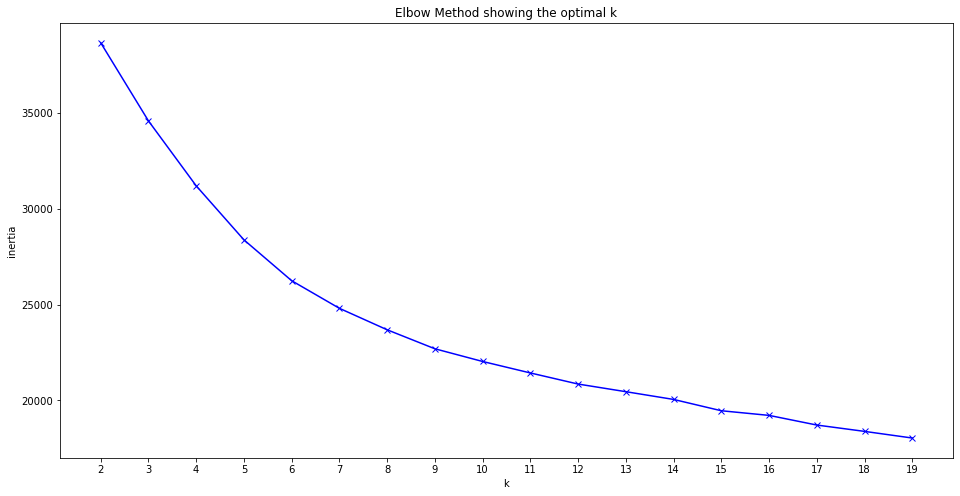

In [24]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

###Maybe at 15 we can see a little elbow

#### 2.2.1. Silouhete

In [28]:
 #same settings as before
K2 = range(2, 20)

silhouette2 = []

for k in K2:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df) #i can use the data framo r the array
    silhouette2.append(silhouette_score(scaled_df, kmeans.predict(scaled_df)))


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

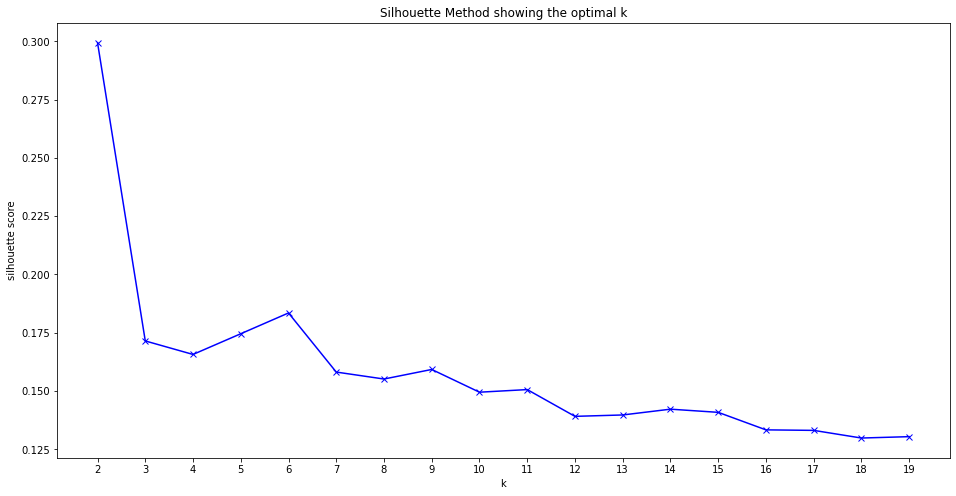

In [29]:
plt.figure(figsize=(16,8))
plt.plot(K2, silhouette2, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K2), max(K2)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
# 2 is the best score but It is too small the number 
#6 would be another option
#9 maybe...

## 3. I choose for one k-mean model

In [30]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(scaled_df)

KMeans(n_clusters=9, random_state=1234)

In [31]:
clusters = kmeans.predict(scaled_df)
clusters

array([8, 7, 7, ..., 7, 7, 5], dtype=int32)

In [32]:
pd.Series(clusters).value_counts().sort_index()

0    177
1    679
2    760
3    375
4    430
5    190
6    243
7    950
8    796
dtype: int64

In [33]:
audio_features_for_cluster["cluster"] = clusters #I create the new colum cluster
audio_features_for_cluster.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.0,0.0906,0.695,109.997,8
1,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.0,0.1010,0.668,168.560,7
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.0,0.0674,0.915,102.977,7
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.0,0.4200,0.464,90.030,2
4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.0,0.0927,0.719,148.088,4


In [36]:
###export the file

audio_features_for_cluster.to_csv("../data/audio_features_for_cluster_labeled.csv")

## 4. Export model

In [34]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

#this is the scaler that i am saving

with open("../data/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)


In [35]:
#same for k-means

with open("../data/kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)